### MNIST Digits Classification
#### Author: Marcus Madumo



In [7]:
import pandas as pd
import pickle
import scipy as sc
from scipy import misc
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from NeuralNetworks import ANN

dataPath_Train = os.path.join("..", "Datasets","mnist","mnist_train.csv")
dataPath_Test  = os.path.join("..", "Datasets","mnist","mnist_test.csv")

## Reading the csv into a dataframe  usually for cleaning and exploring the data 
# @--Better use machine learning studio--@
df_Train = pd.read_csv(dataPath_Train, header=None)
df_Test = pd.read_csv(dataPath_Test, header=None)

"""" 
 Pre-Processing
 Convert into numpy array representation when all is preprocessed
 Y = labels
 X = Features
 transposing the matrices to make examples columns instead of rows
"""""
Train = df_Train.as_matrix()
Test  = df_Test.as_matrix()
#Labels
Y_Train = Train[0:,0]    
Y_Test  = Test[0:,0]
#Features
X_Train = np.transpose(Train[:,1:])
X_Test  = np.transpose(Test[:,1:])


### Preview dimensions and feature values

Preview of Labels Dimensions
[5 0 4 ... 5 6 8]
(60000,)
Preview Features Dimensions
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(784, 60000)
Sample


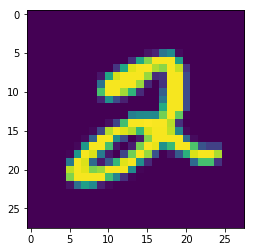

In [2]:

#Verify shapes
print("Preview of Labels Dimensions")
print(Y_Train)
print(np.shape(Y_Train))
print("Preview Features Dimensions")
print(X_Train)
print(np.shape(X_Train))
#Viewing sample images
sample = X_Train[:,5].reshape(28,28)
print("Sample")
plt.imshow(sample)

### Initializing Network 
Network Parameters
The number of neurons and layers in a network is defined by a list layer_dims where the length encodes the number of layers
and its elements as number of neurons

In [3]:
layer_dims = np.array([784,10,30,10])
#Declaring a new neural network
neuralnetwork = ANN(layer_dims,batch_size=1000,optimization="MBGD")


### Training

In [5]:
print("Training ...")
Y_encoded = neuralnetwork.one_hot_encoding(Y_Train)
neuralnetwork.train(X_Train,Y_encoded,10000, 0.001, print_count = 1000)

Training ...
Accuracy: 40.96266080639383
cycle 0
Accuracy: 91.35866682446124
cycle 1000
Accuracy: 97.52944165565509
cycle 2000
Accuracy: 98.87497897467597
cycle 3000
Accuracy: 99.33898059294901
cycle 4000
Accuracy: 99.55214882547004
cycle 5000
Accuracy: 99.66965464130415
cycle 6000
Accuracy: 99.74239779047858
cycle 7000
Accuracy: 99.79112909424222
cycle 8000
Accuracy: 99.82569251058544
cycle 9000
Final Training Accuracy: 99.85126231167528


### Test

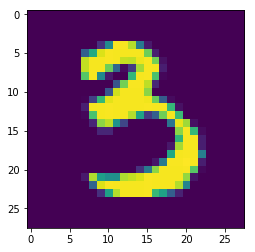

[[1.83718466e-07]
 [6.26556880e-19]
 [1.91789687e-13]
 [9.90051976e-01]
 [4.44981185e-22]
 [9.94769313e-03]
 [4.86255939e-18]
 [6.09922286e-18]
 [1.47132896e-07]
 [3.39814172e-12]]


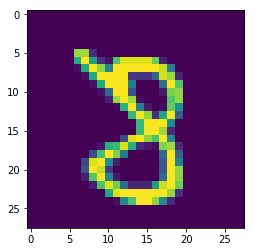

[[7.21517892e-11]
 [3.53460832e-12]
 [7.28575348e-10]
 [9.92321063e-01]
 [1.43167938e-18]
 [4.09808283e-07]
 [3.04610927e-21]
 [5.71311745e-08]
 [7.67262431e-03]
 [5.84539937e-06]]


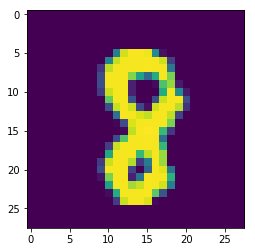

[[1.54844810e-17]
 [2.41561586e-13]
 [8.58018287e-12]
 [2.78742726e-10]
 [1.31202781e-11]
 [6.66261148e-11]
 [5.30423848e-16]
 [1.77193614e-15]
 [9.99999989e-01]
 [1.03012523e-08]]


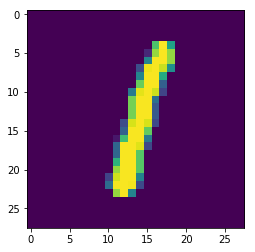

[[2.18704694e-19]
 [9.99997330e-01]
 [5.80609570e-08]
 [2.39949686e-09]
 [7.16696204e-20]
 [5.95259330e-14]
 [6.01621529e-19]
 [4.84396021e-09]
 [2.60489966e-06]
 [8.41214367e-14]]


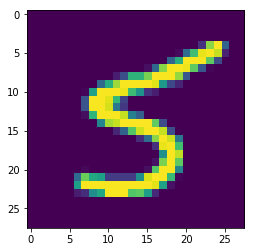

[[1.29653192e-11]
 [1.53204335e-23]
 [6.25203817e-25]
 [4.21098325e-14]
 [6.15095476e-15]
 [9.99999999e-01]
 [1.87399575e-14]
 [2.78018723e-21]
 [1.17641861e-09]
 [2.90972381e-17]]


In [19]:
#Viewing sample images
samples = np.array([])
samples = [X_Test[:,random.randint(0, X_Test.shape[1])] for i in range(5)]
for s in samples:
    plt.imshow(s.reshape(28,28))
    plt.show()
    print(neuralnetwork.predict(s.reshape(784,1)))

### Plotting how the gradient improved over time for both batch and mini batch gradient descent

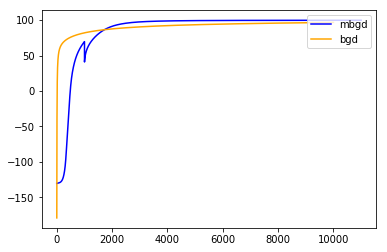

In [20]:
bgd_acc = pickle.load(open( "BGD.pkl", "rb"))
mbgd_acc = pickle.load(open("MBGD.pkl", "rb"))


plt.plot(mbgd_acc, "blue", label="mbgd")
plt.plot(bgd_acc, "orange", label="bgd")
plt.legend(loc="upper right")
plt.show()